In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [47]:
data_path = 'C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'

df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

Y_train = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
X_train = df_train.drop(['Id','SalePrice'],axis = 1)
X_test = df_test.drop(['Id'],axis = 1)
df = pd.concat([X_train,X_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [48]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_feature = []
for dtype,feature in zip(df.dtypes,df.columns):
    if dtype == 'int64' or dtype == 'float64':
        num_feature.append(feature)
print(f'{len(num_feature)} Numerical Features :{num_feature} \n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_feature]
MMEncoder = MinMaxScaler()
df = df.fillna(-1)
train_num = Y_train.shape[0]
df.head()

36 Numerical Features :['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


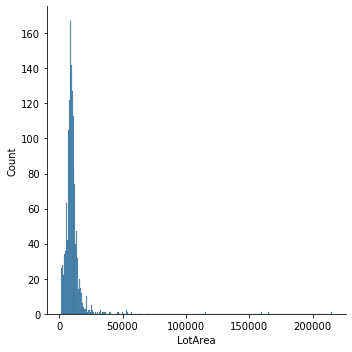

In [49]:
# 顯示 LotArea 的散佈圖
#發現其中有偏態的發生
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['LotArea'][:train_num])
plt.show()

In [53]:
#計算基礎分數
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
estimator = LinearRegression()
#基礎分數
print(cross_val_score(estimator,train_X,Y_train,cv = 5).mean())

0.8454595084023964


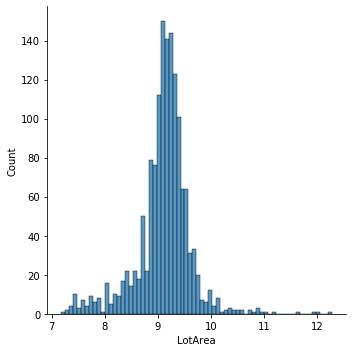

0.8518252325719811

In [63]:
import copy
# 將 LotArea 取 log1p 後, 看散佈圖, 並計算分數
#並用深複製將資料複製且其改變不會影響其原值的值
df_fixed = copy.deepcopy(df)
df_fixed['LotArea'] = np.log1p(df_fixed['LotArea'])
sns.displot(df_fixed['LotArea'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
X_train_fixed = df_fixed[:train_num]
estimator = LinearRegression()
cross_val_score(estimator,X_train_fixed,Y_train,cv = 5).mean()

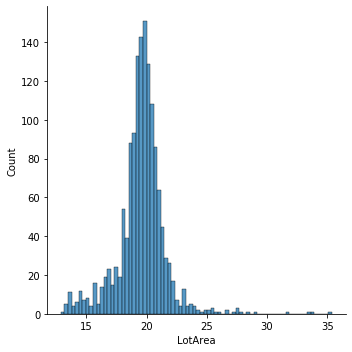

0.8532319270851951


In [74]:
# 將 LotArea 取 boxcox 後, 看散佈圖 , 並計算分數
from scipy import stats
df_fixed_2 = copy.deepcopy(df)
df_fixed_2['LotArea'] = stats.boxcox(df_fixed_2['LotArea'],lmbda = 0.15)
sns.displot(df_fixed_2['LotArea'][:train_num])
plt.show()

df_fixed_2 = MMEncoder.fit_transform(df_fixed_2)
X_train = df_fixed_2[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator,X_train,Y_train,cv=5).mean())

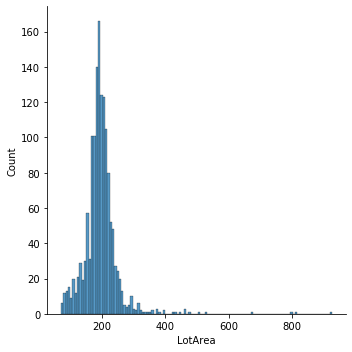

0.8495473512427367


In [77]:
# 將 LotArea 取 sqrt (box-cox : alpha=0.5) 後, 看散佈圖, 並計算分數
df_fixed_3 = copy.deepcopy(df)
df_fixed_3['LotArea'] = stats.boxcox(df_fixed_3['LotArea'],lmbda = 0.5)
sns.displot(df_fixed_3['LotArea'][:train_num])
plt.show()

df_fixed_3 = MMEncoder.fit_transform(df_fixed_3)
X_train = df_fixed_3[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator,X_train,Y_train,cv = 5).mean())

In [167]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import copy
from scipy import stats


In [168]:
data_path_1 = 'C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'
df_1_train = pd.read_csv(data_path_1 + 'titanic_train.csv')
df_1_test = pd.read_csv(data_path_1 + 'titanic_test.csv')

df_1_train.head()
Y_train = df_1_train['Survived']
ids = df_1_test['PassengerId']
X_train = df_1_train.drop(['PassengerId','Survived'],axis = 1)
X_test = df_1_test.drop(['PassengerId'],axis =1)
df = pd.concat([X_train,X_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype,feature in zip(df.dtypes,df.columns):
    if dtype == 'int64' or dtype == 'float64':
        num_features.append(feature)
print(f'{len(num_features)} Numerical Features : {num_features} \n')

df =df[num_features]
df.head()
df = df.fillna(0)

5 Numerical Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 



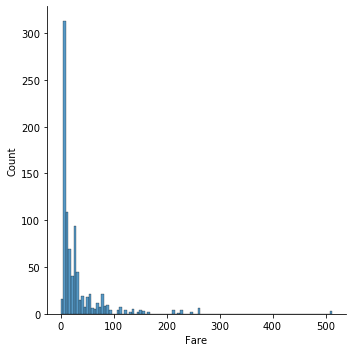

In [170]:
train_num = Y_train.shape[0]
sns.displot(df['Fare'][:train_num])
plt.show()

In [171]:
df_mm = MMEncoder.fit_transform(df)
X_train = df_mm[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator,X_train,Y_train,cv = 5).mean())

0.7016289882888318


C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

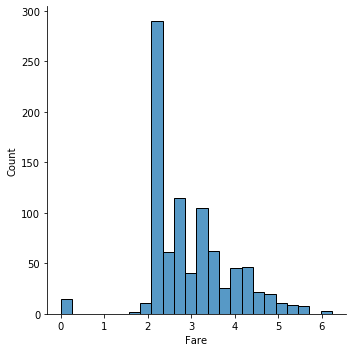

0.7106367963253961


C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [172]:
#* 試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?
df_fixed = copy.deepcopy(df)
df_fixed = df_fixed.fillna(-1)
df_fixed['Fare'] = np.log1p(df_fixed['Fare'])
sns.displot(df_fixed['Fare'][:train_num])
plt.show()

df_fixed_mm = MMEncoder.fit_transform(df_fixed)
X_train = df_fixed_mm[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator,X_train,Y_train,cv =5).mean())

C:\Users\francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
7.25
71.2833
7.925
53.1
8.05
8.4583
51.8625
21.075
11.1333
30.0708
16.7
26.55
8.05
31.275
7.8542
16.0
29.125
13.0
18.0
7.225
26.0
13.0
8.0292
35.5
21.075
31.3875
7.225
263.0
7.8792
7.8958
27.7208
146.5208
7.75
10.5
82.1708
52.0
7.2292
8.05
18.0
11.2417
9.475
21.0
7.8958
41.5792
7.8792
8.05
15.5
7.75
21.6792
17.8
39.6875
7.8
76.7292
26.0
61.9792
35.5
10.5
7.2292
27.75
46.9
7.2292
80.0
83.475
27.9
27.7208
15.2458
10.5
8.1583
7.925
8.6625
10.5
46.9
73.5
14.4542
56.4958
7.65
7.8958
8.05
29.0
12.475
9.0
9.5
7.7875
47.1
10.5
15.85
34.375
8.05
263.0
8.05
8.05
7.8542
61.175
20.575
7.25
8.05
34.6542
63.3583
23.0
26.0
7.8958
7.8958
77.2875
8.6542
7.925
7.8958
7.65
7.775
7.8958
24.15
52.0
14.4542
8.05
9.825
14.4583
7.925
7.75
21.0
247.5208
31.275
73.5
8.05
30.0708
13.0
77.2875
11.2417
7.75
7.1417
22.3583
6.975
7.8958
7.05
14.5
26.0
13.0
15.0458
26.2833
53.1
9.2167
79.2
15.2458
7.75
15.85
6.75
11.5
36.75
7.79

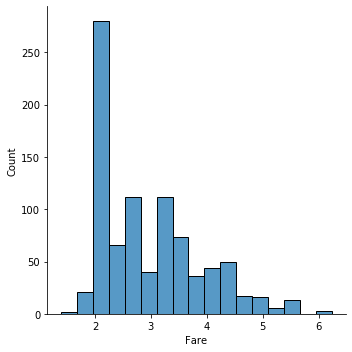

0.697128258269153


C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\francis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [216]:
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數 (執行會有 error, 請試圖修正)

df_fixed_2 = copy.deepcopy(df)
number = 0
for i in df_fixed_2['Fare']:
    if i == 0 or i == 0.0:
        df_fixed_2['Fare'][number:number+1] = df_fixed_2['Fare'].mean()
        print('True')
    number += 1
#或者是利用logp1的方法，將所有的直往後加1
#df_fixed_2['Fare'] = df_fixed_2['Fare']+1

for i in df_fixed_2['Fare']:
    print(i)
print(df_fixed_2['Fare'])
df_fixed_2['Fare'] = stats.boxcox(df_fixed_2['Fare'],lmbda = 0)
sns.displot(df_fixed_2['Fare'][:train_num])
plt.show()

df_fixed_2mm = MMEncoder.fit_transform(df_fixed_2)
X_train = df_fixed_2mm[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator,X_train,Y_train,cv = 5).mean())

0    7.2500
0    7.8292
Name: Fare, dtype: float64